## <span style="color:#008abc"><b>Telecom Churn Case Study</b></span>

<span style="color:#008abc"><b>Problem Statement</b></span>

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

<span style="color:#008abc"><b>Business Goal</b></span>

- Derive new features
- Filter high-value customers
- Tag churners and remove attributes of the churn phase
- Handle class imbalance

Build models to predict churn. The predictive model that you’re going to build will serve two purposes:

- It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

- It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.


<b>Final</b></n>

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## <span style="color:#008abc"><b> Data Collection</b></span>

> ### <span style="color:#008abc">Import Libraries</span>

In [1]:
## Analysis & Computation
import pandas as pd
import numpy as np

## Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Parameters
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,3),
          'axes.labelsize': 'x-large',
          'axes.labelcolor': '#008abc',
          'axes.titlesize':'15',
          'text.color':'green',
          'axes.titlepad': 35,
          'xtick.labelsize':'small',
          'ytick.labelsize':'small'}
plt.rcParams.update(params)

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Autocomplete cell
%config IPCompleter.greedy=True

## Display full text
pd.set_option('display.max_colwidth', -1)

> ### <span style="color:#008abc">Read the data</span>

In [2]:
usage_df = pd.read_csv('telecom_churn_data.csv')
usage_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
## Data Dictionary
metadata = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
metadata

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


> ### <span style="color:#008abc">Inspect the data</span>

In [4]:
usage_df.shape

(99999, 226)

In [183]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
usage_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [6]:
def Info(text):
    from IPython.display import display, HTML
    data=HTML('''<div class="alert alert-block alert-info"><span style="color:black">'''+text+'''</span></div>''')
    display(data)

___

## <span style="color:#008abc"><b> Data Preparation & Cleaning</b></span>

## <span style="color:#008abc"><b>Filter high-value customers</b></span>

As per the requireemnt, the churn needs to be predicted only for the high-value customers, i.e, Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [7]:
## Fecth columns containing recharge data
recharge_columns = [col for col in usage_df.columns if 'rech' in col]
print(recharge_columns)
text="Let's compute the average recharge amount for the 6th and 7th month. For that we will compute the total data recharge and then use it with the actual total recharge for that month"
Info(text)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [8]:
## Compute total recharge amount for the 6th month

total_data_recharge_june = usage_df.total_rech_data_6.fillna(0)*usage_df.av_rech_amt_data_6.fillna(0)
total_recharge_june = usage_df.total_rech_amt_6.fillna(0) + total_data_recharge_june.fillna(0)

## Compute total recharge amount for the 7th month
total_data_recharge_july = usage_df.total_rech_data_7.fillna(0)*usage_df.av_rech_amt_data_7.fillna(0)
total_recharge_july = usage_df.total_rech_amt_7.fillna(0) + total_data_recharge_july.fillna(0)

## Average recharge amount 
avg_recharge = (total_recharge_june+total_recharge_july)/2

## 70th percentile of average
avg_rech_70_perc = np.percentile(avg_recharge, 70.0)

## Records where recharge is greater than 70th percentile
high_val_cust_df = usage_df[avg_recharge>=avg_rech_70_perc]
high_val_cust_df.shape

text = "<b>Inference:</b> The 70th percentile of average spend for the 6th and 7th month is <b>%s</b>, and there are <b>%s</b> high value customers, who have recharged more than %s"%(avg_rech_70_perc,high_val_cust_df.shape[0],avg_rech_70_perc)
Info(text)

___

## <span style="color:#008abc"><b>Tag Churners</b></span>

The customers need to be tagged as (churn=1, else 0) based on the fourth month as follows, based ont he requirement:
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes that need to be used to tag churners are:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

After tagging churners, all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names) has to be removed.

In [9]:
## Let's check the 4 columns that are required to tag the customer as churn
high_val_cust_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> There are no NULL values in any of the 4 columns. Let's proceed to tag the customers.
</div>

In [10]:
## Tag customers as churn when all the 4 columns are 0
high_val_cust_df['churn'] = np.where(high_val_cust_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(1)==0,1,0)
high_val_cust_df[['churn','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,churn,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,1,0.00,0.00,0.00,0.00
7,1,0.00,0.00,0.00,0.00
8,0,34.91,142.18,0.00,0.00
21,0,252.61,1031.53,0.00,0.00
23,0,127.48,127.63,13.93,314.74


In [11]:
## Rename columns containing month names to number format
high_val_cust_df.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [12]:
## Remove columns pertaining to churn - 9th month data
cols_to_drop = [ col for col in high_val_cust_df.columns if '_9' in col]
high_val_cust_df.drop(cols_to_drop,1,inplace=True)
high_val_cust_df.shape

(30001, 172)

___ 

> ### <span style="color:#008abc">Handle missing values </span>

In [13]:
## Let's look at the missing value percentages and drop columns with more than 40% null values.
mis_val_perc = round((high_val_cust_df.isnull().sum()/len(high_val_cust_df))*100,2)
cols_to_drop = mis_val_perc.loc[(mis_val_perc>40)].sort_values(ascending=False).index
cols_to_drop

Index(['fb_user_8', 'arpu_3g_8', 'date_of_last_rech_data_8',
       'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8',
       'av_rech_amt_data_8', 'count_rech_3g_8', 'arpu_2g_8',
       'night_pck_user_8', 'arpu_2g_6', 'count_rech_3g_6', 'fb_user_6',
       'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6',
       'night_pck_user_6', 'date_of_last_rech_data_6', 'av_rech_amt_data_6',
       'arpu_3g_6', 'count_rech_3g_7', 'arpu_2g_7', 'fb_user_7',
       'night_pck_user_7', 'max_rech_data_7', 'av_rech_amt_data_7',
       'total_rech_data_7', 'arpu_3g_7', 'date_of_last_rech_data_7',
       'count_rech_2g_7'],
      dtype='object')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> We will drop the columns having more than 40% of missing values, as imputing them will lead to creation of bias.
</div>

In [14]:
high_val_cust_df.drop(cols_to_drop,1,inplace=True)
high_val_cust_df.shape

(30001, 142)

In [15]:
mis_val_perc = round((high_val_cust_df.isnull().sum()/len(high_val_cust_df))*100,2)
cols_to_drop = mis_val_perc.loc[(mis_val_perc<40) & (mis_val_perc>0)].sort_values(ascending=False)
print(cols_to_drop.index)
cols_to_drop.unique()

Index(['loc_og_t2f_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2m_mou_8',
       'isd_og_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2c_mou_8', 'loc_ic_mou_8',
       'loc_og_mou_8', 'loc_ic_t2f_mou_8', 'std_og_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'std_og_t2f_mou_8', 'og_others_8', 'std_og_t2c_mou_8', 'spl_og_mou_8',
       'loc_og_t2m_mou_8', 'std_og_mou_8', 'spl_ic_mou_8', 'roam_ic_mou_8',
       'loc_og_t2t_mou_8', 'std_ic_t2o_mou_8', 'ic_others_8', 'onnet_mou_8',
       'roam_og_mou_8', 'isd_ic_mou_8', 'std_ic_mou_8', 'offnet_mou_8',
       'date_of_last_rech_8', 'std_og_t2t_mou_6', 'loc_og_t2f_mou_6',
       'std_og_t2m_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6',
       'std_og_t2f_mou_6', 'loc_og_mou_6', 'offnet_mou_6', 'std_og_t2c_mou_6',
       'loc_og_t2t_mou_6', 'loc_og_t2c_mou_6', 'std_og_mou_6', 'onnet_mou_6',
       'loc_og_t2m_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'loc_ic_t2m_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2o_mou_6', 'std_ic

array([3.91, 1.94, 1.82, 1.79, 0.75, 0.55, 0.33, 0.24, 0.09])

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> Most of the columns have less than 4% of missing values. As most of the columns are related to usage and price(excluding date of last recharge columns), we can replace the missing values with 0. As imputing them would be incorrect in the current scenario.
</div>

___

In [16]:
## Replace Nan's in price related columns with 0
price_cols = [ col for col in cols_to_drop.index if 'date' not in col ]
high_val_cust_df[price_cols]=high_val_cust_df[price_cols].fillna(0)

In [17]:
mis_val_perc = round((high_val_cust_df.isnull().sum()/len(high_val_cust_df))*100,2)
cols_to_drop = mis_val_perc.loc[(mis_val_perc<40) & (mis_val_perc>0)].sort_values(ascending=False)
cols_to_drop

date_of_last_rech_8     1.94
last_date_of_month_8    0.55
date_of_last_rech_7     0.33
date_of_last_rech_6     0.24
last_date_of_month_7    0.09
dtype: float64

In [18]:
## Replace Nan's with correct values
high_val_cust_df['last_date_of_month_8']=high_val_cust_df['last_date_of_month_8'].fillna('8/31/2014')
high_val_cust_df['last_date_of_month_7']=high_val_cust_df['last_date_of_month_7'].fillna('7/31/2014')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> All the columns are of `date` type. Of them `last_date_of_month` is a static value for the month.Let's handle the remaining columns seperately.
</div>


In [19]:
## Replace Nan's in date related columns with a static date
mis_val_perc = round((high_val_cust_df.isnull().sum()/len(high_val_cust_df))*100,2)
cols_to_drop=mis_val_perc[mis_val_perc!=0].index
cols_to_drop

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [20]:
## Let's change the date column to number of days from the churn month
## If date is NULL lets impute with a static value 100
import datetime
high_val_cust_df['date_of_last_rech_6']=pd.to_datetime(high_val_cust_df['date_of_last_rech_6'])
high_val_cust_df['last_date_of_month_6']=pd.to_datetime(high_val_cust_df['last_date_of_month_6'])
high_val_cust_df['last_rech_days_6'] = (high_val_cust_df['last_date_of_month_6'] - high_val_cust_df['date_of_last_rech_6']).dt.days

high_val_cust_df['date_of_last_rech_7']=pd.to_datetime(high_val_cust_df['date_of_last_rech_7'])
high_val_cust_df['last_date_of_month_7']=pd.to_datetime(high_val_cust_df['last_date_of_month_7'])
high_val_cust_df['last_rech_days_7'] = (high_val_cust_df['last_date_of_month_7'] - high_val_cust_df['date_of_last_rech_7']).dt.days

high_val_cust_df['date_of_last_rech_8']=pd.to_datetime(high_val_cust_df['date_of_last_rech_8'])
high_val_cust_df['last_date_of_month_8']=pd.to_datetime(high_val_cust_df['last_date_of_month_8'])
high_val_cust_df['last_rech_days_8'] = (high_val_cust_df['last_date_of_month_8'] - high_val_cust_df['date_of_last_rech_8']).dt.days


KeyboardInterrupt: 

In [ ]:
## Let's handle the Nan's in the newly created columns
high_val_cust_df.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'],1,inplace=True)
high_val_cust_df[['last_rech_days_6','last_rech_days_7','last_rech_days_8']]=high_val_cust_df[['last_rech_days_6','last_rech_days_7','last_rech_days_8']].fillna(99)

In [ ]:
## Replace Nan's in date related columns with a static date
mis_val_perc = round((high_val_cust_df.isnull().sum()/len(high_val_cust_df))*100,2)
cols_to_drop=mis_val_perc[mis_val_perc!=0].index
cols_to_drop

> ### Check columns with 1 value

In [ ]:
unique_values = [[i,high_val_cust_df[i].nunique()] for i in high_val_cust_df.columns ]
unique_values_df = pd.DataFrame(unique_values,columns=['col','value'])
unique_values_df[unique_values_df.value==1].col
values = [ [i,high_val_cust_df[i].unique()] for i in unique_values_df[unique_values_df.value==1].col]
values

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> All the columns have only one value and most of them are 0. Let's delete the columns that contain only a single value.
</div>


In [ ]:
high_val_cust_df.drop(unique_values_df[unique_values_df.value==1].col,1,inplace=True)
high_val_cust_df.shape

## <span style="color:#008abc"><b> Data Analysis(EDA): </b></span>

In [ ]:
high_val_cust_df.info()

In [ ]:
def plotbox(col):
    for i in range(6,9):
        if (high_val_cust_df[col+'_'+str(i)].nunique()>200):
            Q1 = high_val_cust_df[col+'_'+str(i)].quantile(0.05)
            Q3 = high_val_cust_df[col+'_'+str(i)].quantile(0.95)
            plot_df = high_val_cust_df[(high_val_cust_df[col+'_'+str(i)] >= Q1) & (high_val_cust_df[col+'_'+str(i)]<= Q3)]
            ## Plot the resultant data
            plt.subplot(1,3,i-5)
            sns.boxplot(data=plot_df, y=col+'_'+str(i) ,x='churn')
            plt.yscale('symlog')
            plt.tight_layout()
        else:
#             high_val_cust_df.drop([col+'_'+str(i)],1,inplace=True)
              print(col)
    plt.show() 

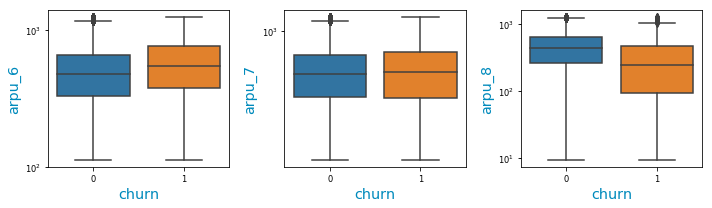

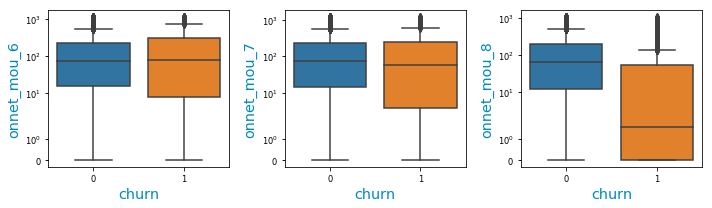

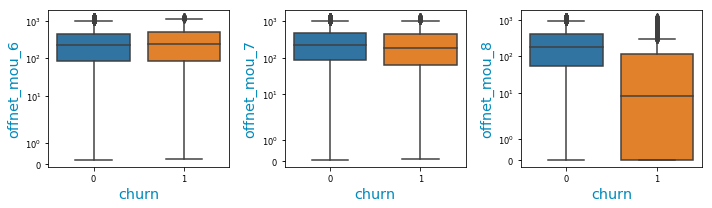

In [220]:
plotbox('arpu')
plotbox('onnet_mou')
plotbox('offnet_mou')

In [ ]:
plotbox('roam_ic_mou')
plotbox('roam_og_mou')

In [ ]:
plotbox('loc_og_t2t_mou')
plotbox('loc_og_t2m_mou')

In [ ]:
plotbox('loc_og_t2f_mou')
plotbox('loc_og_t2c_mou')

In [ ]:
plotbox('loc_og_mou')
plotbox('std_og_t2t_mou')
plotbox('std_og_t2m_mou')
plotbox('std_og_t2f_mou')

In [ ]:
plotbox('std_og_mou')
plotbox('isd_og_mou')
plotbox('spl_og_mou')

In [ ]:
high_val_cust_df.columns[49:61]

In [ ]:
plotbox('og_others')
plotbox('total_og_mou')

In [ ]:
plotbox('loc_ic_t2t_mou')
plotbox('loc_ic_t2m_mou')
plotbox('loc_ic_t2f_mou')
plotbox('loc_ic_mou')

In [ ]:
plotbox('std_ic_t2t_mou')
plotbox('std_ic_t2m_mou')
plotbox('std_ic_t2f_mou')
plotbox('std_ic_mou')

In [ ]:
plotbox('total_ic_mou')
plotbox('spl_ic_mou')
plotbox('isd_ic_mou')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> The total incoming and outgoing calls during the 8th month seems to be a strong indicator of churn.
    </span>
</div>

In [ ]:
plotbox('total_rech_num')
plotbox('total_rech_amt')
plotbox('max_rech_amt')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> The total recharge amount during the 8th month seems to be a strong indicator of churn.
    </span>
</div>

In [ ]:
# plotbox('date_of_last_rech')
# plotbox('last_day_rch_amt')
plotbox('vol_2g_mb')
plotbox('vol_3g_mb')

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> The volume of 2g recharges during the 8th month seems to be a strong indicator of churn.
    </span>
</div>

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> From the above plots we can see that the customer behaviour during the <b>6th and 7th months (i.e) good phase</b> doesn't vary much , whereas the 8th month data seems to strongly affect churn. Hence let's merge the data for the 6th and 7th month and take the average for our analysis.
    </span>
</div>

In [ ]:
print(high_val_cust_df.shape)
col67=list(set([col[:-2] for col in high_val_cust_df.columns if ('6' in col) or ('7' in col)]))
for col in col67:
    col_avg = "avg_"+col+"_627"
    col_6 = col+"_6"
    col_7 = col+"_7"
    high_val_cust_df[col_avg] = (high_val_cust_df[col_6] + high_val_cust_df[col_7])/2

In [ ]:
print(high_val_cust_df.shape)
col67=[col for col in high_val_cust_df.columns if (col.endswith('_6')) or ( col.endswith('_7'))]
high_val_cust_df.drop(col67,1,inplace=True)
print(high_val_cust_df.shape)

### <span style="color:#008abc"><b>Target variable analysis</b></span>

In [ ]:
churn_perc = round(((high_val_cust_df['churn'].value_counts()/len(high_val_cust_df))*100),2)
plt.font_size=45

churn_perc.plot(kind='pie',labels=['No','Yes'],autopct='%1.0f%%',figsize=(5,5),textprops={'color':"w",'fontsize': 14})
plt.title("Churn Distribution")

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>From the plot, we can see that the churn data is highly skewed, a classic case of class imbalance. We will handle the same in the modelling part </span>
</div>


In [ ]:
incoming = [col for col in high_val_cust_df.columns if 'ic' in col]
print(incoming)
plt.figure(figsize=(53, 53))
ic=high_val_cust_df[incoming].corr()
sns.heatmap(ic, cmap="YlGnBu", annot=True)

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> The information in the columns
        <ul>
            <li>loc_ic_mou_{6,7,8}</li>
            <li>std_ic_mou_{6,7,8}</li>
            <li>total_ic_mou_{6,7,8}</li>
            <li>loc_og_mou_{6,7,8}</li>
            <li>std_og_mou_{6,7,8}</li>
            <li>total_og_mou_{6,7,8}</li>
        </ul>
        are the summations of informations from the other columns containing the split up's of incoming and outgoing data. They are also highly correlated. Hence we can delete these columns.
    </span>
</div>

In [ ]:
sum_col = [col for col in high_val_cust_df.columns if ('ic_t' in col) or ('og_t' in col) ]
print(sum_col)
high_val_cust_df.drop(sum_col,1,inplace=True)
print(high_val_cust_df.shape)

In [ ]:
outgoing = [col for col in high_val_cust_df.columns if 'og' in col]
plt.figure(figsize=(53, 53))
og=high_val_cust_df[outgoing].corr()
sns.heatmap(og, cmap="YlGnBu", annot=True)

## <span style="color:#008abc"><b> Feature Engineering</b></span>

> ### <span style="color:#008abc">Tenure of customer (in years) </span>

In [ ]:
high_val_cust_df['aon_years']=high_val_cust_df['aon']/365
high_val_cust_df.drop('aon',1,inplace=True)
high_val_cust_df['aon_years'].describe()

In [ ]:
churn1=high_val_cust_df.loc[high_val_cust_df.churn == 1]['aon_years']
churn0=high_val_cust_df.loc[high_val_cust_df.churn == 0]['aon_years']
sns.distplot(churn1,label='Churned',hist=False,rug=True)
sns.distplot(churn0,label='Not Churned',hist=False,rug=True)
plt.legend()

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>From the plot we can see huge number of customers who are associated with the firm for less than 4 years have churned. </span>
</div>


> ### <span style="color:#008abc">Differences in revenue and recharge amount </span>

In [ ]:
high_val_cust_df.columns
high_val_cust_df['arpu_diff']=high_val_cust_df['arpu_8']-high_val_cust_df['avg_arpu_627']
high_val_cust_df['total_rech_amt_diff']=high_val_cust_df['total_rech_amt_8']-high_val_cust_df['avg_total_rech_amt_627']
high_val_cust_df['total_og_diff'] = high_val_cust_df['total_og_mou_8']-high_val_cust_df['avg_total_og_mou_627']
high_val_cust_df['total_ic_diff'] = high_val_cust_df['total_ic_mou_8']-high_val_cust_df['avg_total_ic_mou_627']

## <span style="color:#008abc"><b> Model Building</b></span>

In [ ]:
model_df = high_val_cust_df.copy()
model_df.drop('mobile_number',1,inplace=True)
model_df.shape

In [ ]:
### Under sampling
count_class_0, count_class_1 = model_df['churn'].value_counts()
model_dfa = model_df[model_df['churn']==0]
model_dfb = model_df[model_df['churn']==1]
model_df_class_0_under = model_dfa.sample(count_class_1)
model_df_test_under = pd.concat([model_df_class_0_under, model_dfb], axis=0)
model_df =model_df_test_under

In [ ]:
## Divide into X and Y set for model building
y = model_df.pop('churn')
X = model_df

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

> ### <span style="color:#008abc"><b>1. RFE & Logistic Regression</b></span>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
rfe = RFE(logreg,15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
## Features selected by rfe
rfe.support_
model_df.columns[rfe.support_]

In [251]:
## Create dataset with the features selected by RFE
X_train_rfe=pd.DataFrame(data=X_train).iloc[:,rfe.support_]
X_test_rfe=pd.DataFrame(data=X_test).iloc[:,rfe.support_]

In [252]:
## Run Logistic regression
logreg = LogisticRegression(random_state=2,class_weight='balanced')
logreg.fit(X_train_rfe,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [253]:
## PRedict on test dataset
y_pred=logreg.predict(X_test_rfe)

> ### Metrics

In [256]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(y_test,y_pred))
print("F1 score:",metrics.f1_score(y_test,y_pred))
print("\nClassification Report:",metrics.classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred))

Accuracy score: 0.8389078498293515
F1 score: 0.8345021037868162

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.84      0.84       758
           1       0.83      0.84      0.83       707

    accuracy                           0.84      1465
   macro avg       0.84      0.84      0.84      1465
weighted avg       0.84      0.84      0.84      1465


Confusion Matrix:
 [[634 124]
 [112 595]]


> ### Feature wightage

In [257]:
feature_weights = pd.Series(logreg.coef_[0],index=model_df.columns[rfe.support_]).sort_values(ascending=False)
feature_weights

last_rech_days_8        0.896049
avg_roam_og_mou_627     0.366200
avg_vol_2g_mb_627       0.317935
avg_max_rech_amt_627    0.312222
aon_years              -0.243165
total_ic_mou_8         -0.280148
avg_monthly_2g_627     -0.339477
loc_og_mou_8           -0.371504
vol_3g_mb_8            -0.410758
total_ic_diff          -0.434953
vol_2g_mb_8            -0.440695
sachet_2g_8            -0.443210
last_day_rch_amt_8     -0.446952
total_og_diff          -0.575863
loc_ic_mou_8           -0.616697
dtype: float64

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> Metrics for RFE with Logistic Regression: 
    <b><ul>
        <li>Accuracy: 84% </li>
        <li>Precision: 83% </li>
        <li>Recall: 84% </li>
        <li>F1 score: 83% </li>
        </ul></b>
        <b>Feature Importance:</b>  The features 
        <b><ul>
        <li>last_rech_days_8,loc_ic_mou_8,total_og_diff,last_day_rch_amt_8,avg_roam_og_mou_627</li>
        </ul></b>
        highly determine churn.The same was observed in EDA too.Ideally the customers behaviour during the action phase is a crucial indicator for churn, expecially the recharge amount and the outgoing call difference.
    </span>
</div>


> ### <span style="color:#008abc"><b> 2. PCA & Logistic Regression</b></span>

In [264]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
logreg_pca = LogisticRegression(class_weight='balanced')
logreg_pca.fit(X_train_pca,y_train)

y_pred_pca = logreg_pca.predict(X_test_pca)
y_pred_pca = pd.DataFrame(data=y_pred_pca)

> ### Metrics

In [265]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(y_test,y_pred_pca))
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred_pca))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred_pca))

Accuracy score: 0.8293515358361775

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       758
           1       0.82      0.84      0.83       707

    accuracy                           0.83      1465
   macro avg       0.83      0.83      0.83      1465
weighted avg       0.83      0.83      0.83      1465


Confusion Matrix:
 [[624 134]
 [116 591]]


> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> Metrics for PCA with Logistic Regression: 
    <b><ul>
        <li>Accuracy: 83% </li>
        <li>Precision: 82% </li>
        <li>Recall: 84% </li>
        <li>F1 score: 83% </li>
        </ul></b>
    </span>
</div>


In [266]:
colnames = list(model_df.columns)
pca_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
pca_df

,Feature,PC1,PC2,PC3
0,arpu_8,0.308411,0.069059,-0.018149
1,onnet_mou_8,0.206818,-0.057807,-0.156218
2,offnet_mou_8,0.242550,-0.029680,-0.106100
3,roam_ic_mou_8,0.027910,-0.020238,0.025314
4,roam_og_mou_8,0.076029,-0.017646,0.048159
5,loc_og_mou_8,0.213219,0.056274,-0.018224
6,std_og_mou_8,0.203247,-0.096185,-0.210942
7,isd_og_mou_8,0.068506,-0.008196,0.101471
8,spl_og_mou_8,0.078054,-0.005831,-0.096834
9,og_others_8,0.006112,0.008538,-0.013690


In [267]:
### list the PCA components
pca.components_

array([[ 3.08410651e-01,  2.06818248e-01,  2.42550280e-01, ...,
         1.15248580e-01,  7.74389447e-02,  6.04730971e-02],
       [ 6.90588126e-02, -5.78069249e-02, -2.96804239e-02, ...,
         2.65669956e-01,  2.86579824e-01,  1.34959731e-01],
       [-1.81493558e-02, -1.56218141e-01, -1.06100427e-01, ...,
        -2.46854586e-01, -1.58886637e-01, -1.45065361e-01],
       ...,
       [-0.00000000e+00,  2.11274806e-15,  2.13255650e-15, ...,
        -3.31651804e-01, -3.22807572e-01,  2.96608363e-01],
       [ 0.00000000e+00, -2.94666043e-15, -2.86280144e-15, ...,
         6.27988561e-02,  3.84771740e-01,  3.58354465e-01],
       [-5.78575093e-01, -3.33066907e-16, -2.77555756e-16, ...,
        -2.01227923e-16, -2.95406061e-14, -1.25829902e-13]])

In [268]:
### Variance Ratio
pca.explained_variance_ratio_

array([1.29111946e-01, 9.77667091e-02, 7.30196235e-02, 5.60216117e-02,
       4.74508773e-02, 3.98161602e-02, 3.43526898e-02, 3.29649839e-02,
       3.09895408e-02, 2.59864561e-02, 2.42723107e-02, 2.36002583e-02,
       2.25570596e-02, 2.15664302e-02, 2.10733664e-02, 2.05551275e-02,
       1.93127991e-02, 1.70739134e-02, 1.65334970e-02, 1.55523744e-02,
       1.49369424e-02, 1.46073200e-02, 1.38171258e-02, 1.32488101e-02,
       1.22878562e-02, 1.17945602e-02, 1.16100045e-02, 1.07607257e-02,
       1.01664282e-02, 9.88084332e-03, 9.53044868e-03, 8.73308260e-03,
       8.45237752e-03, 8.00132878e-03, 7.51346533e-03, 6.25162628e-03,
       5.94420019e-03, 5.78953692e-03, 5.02090494e-03, 4.79576951e-03,
       4.59492202e-03, 4.48491132e-03, 4.04630964e-03, 3.69167215e-03,
       3.57699387e-03, 3.43518395e-03, 3.18810955e-03, 2.85082456e-03,
       2.37719273e-03, 2.01192051e-03, 1.44918864e-03, 1.09992717e-03,
       4.67464538e-04, 3.25898918e-06, 1.02854885e-06, 4.14171136e-12,
      

#### Scree Plot

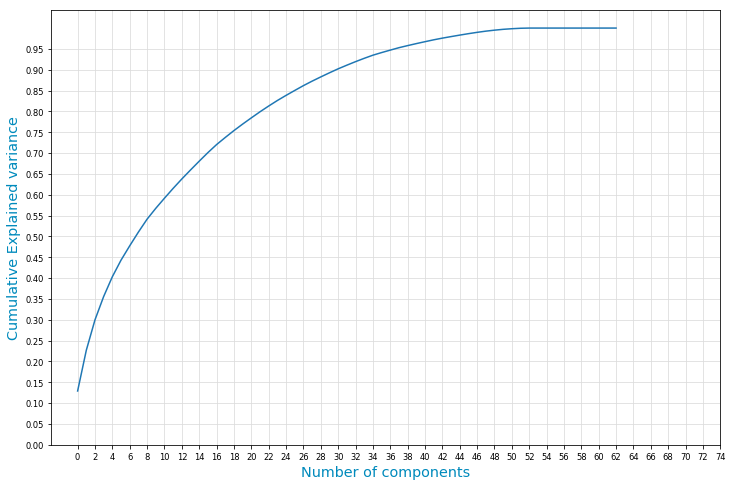

In [269]:
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')
plt.rc('grid', linestyle="-", color='gainsboro')
plt.yticks(np.arange(0, 1.0, 0.05))
plt.xticks(np.arange(0, 75, 2))
plt.grid()
plt.show()

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>Close to 95% of the data is explined by 36 components </span>
</div>


> ### <span style="color:#008abc"><b>2a. PCA with 36 components & Logistic Regression</b></span>

In [270]:
from sklearn.decomposition import PCA
pca_36 = PCA(n_components=36)
X_train_pca_36 = pca_36.fit_transform(X_train)
X_test_pca_36 = pca_36.transform(X_test)
logreg_pca = LogisticRegression(class_weight='balanced')
logreg_pca.fit(X_train_pca_36,y_train)

y_pred_pca_36 = logreg_pca.predict(X_test_pca_36)
y_pred_pca = pd.DataFrame(data=y_pred_pca_36)

> ### Metrics

In [271]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(y_test,y_pred_pca_36))
print("F1 score:",metrics.f1_score(y_test,y_pred_pca_36))
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred_pca_36))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred_pca_36))

Accuracy score: 0.8334470989761092
F1 score: 0.8298465829846583

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       758
           1       0.82      0.84      0.83       707

    accuracy                           0.83      1465
   macro avg       0.83      0.83      0.83      1465
weighted avg       0.83      0.83      0.83      1465


Confusion Matrix:
 [[626 132]
 [112 595]]


> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> Metrics for PCA with 36 components, with Logistic Regression: 
    <b><ul>
        <li>Accuracy: 83% </li>
        <li>Precision: 82% </li>
        <li>Recall: 84% </li>
        <li>F1 score: 83% </li>
        </ul></b>
    </span>
</div>


> ### <span style="color:#008abc"><b>3. LASSO & Decision Tree</b></span>

In [272]:
from sklearn.model_selection import train_test_split
## Split into training and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

## Scale the columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape

(3417, 63)

In [275]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train_lasso = model.transform(X_train)
ind = model.get_support(indices=True)

print(X_train_lasso.shape)
print(ind)

(3417, 10)
[ 5 11 13 22 23 24 28 59 60 61]


In [276]:
## Feature vector for decision tree
lasso_features = list(model_df.columns[ind])
print(lasso_features)

['loc_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'last_rech_days_8', 'arpu_diff', 'total_rech_amt_diff', 'total_og_diff']


### <span style="color:#008abc"><b> 3a. Decision Tree with default hyperparameter</b></span>

In [277]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5,class_weight='balanced')
dt_default.fit(X_train_lasso, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [278]:
X_test_lasso = pd.DataFrame(data=X_test).iloc[:, ind]
y_pred_lasso = dt_default.predict(X_test_lasso)

> ### Metrics

In [279]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(y_test,y_pred_lasso))
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred_lasso))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred_lasso))

Accuracy score: 0.8204778156996587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82       758
           1       0.81      0.83      0.82       707

    accuracy                           0.82      1465
   macro avg       0.82      0.82      0.82      1465
weighted avg       0.82      0.82      0.82      1465


Confusion Matrix:
 [[618 140]
 [123 584]]


> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> Decision tree(Default hyperparameters) with LASSO. 
    <b><ul>
        <li>Accuracy: 82% </li>
        <li>Precision: 81% </li>
        <li>Recall: 83% </li>
        <li>F1 score: 82% </li>
        </ul></b>
    </span>
</div>


>### <span style="color:#008abc"><b> Tuning Hyperparameters:</b></span>

> #### <span style="color:#008abc"><b> Tuning max_depth:</b></span>

In [300]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced',
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             sco

In [301]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003789,0.000399,0.000798,0.000399,1,{'max_depth': 1},0.776316,0.783626,0.754386,0.773060,...,0.773778,0.010395,12,0.779363,0.782291,0.790340,0.783102,0.773675,0.781754,0.005419
1,0.007180,0.000398,0.000599,0.000489,2,{'max_depth': 2},0.769006,0.798246,0.777778,0.784773,...,0.787533,0.013971,8,0.791072,0.803879,0.811562,0.806511,0.806216,0.803848,0.006862
2,0.009772,0.002310,0.000999,0.000002,3,{'max_depth': 3},0.793860,0.815789,0.792398,0.793558,...,0.802458,0.011271,4,0.814124,0.823637,0.830589,0.830285,0.820841,0.823895,0.006173
3,0.009907,0.005390,0.000399,0.000489,4,{'max_depth': 4},0.807018,0.818713,0.789474,0.797950,...,0.805677,0.010824,3,0.824003,0.828028,0.841932,0.844550,0.827057,0.833114,0.008416
4,0.009373,0.007653,0.003124,0.006249,5,{'max_depth': 5},0.811404,0.817251,0.792398,0.796486,...,0.808897,0.012875,2,0.841566,0.846323,0.852543,0.850402,0.840219,0.846211,0.004799


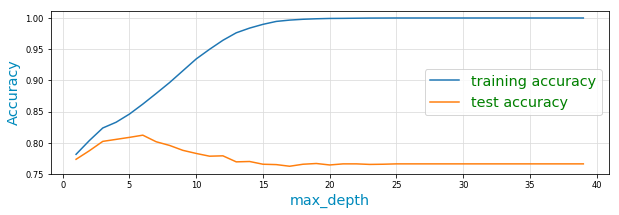

In [303]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>From the above graph <b>max_depth</b> of <b>10</b> seems to be optimal.
    </span>
</div>

> #### <span style="color:#008abc"><b> Tuning min_samples_split:</b></span>

In [304]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100,class_weight='balanced')

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [305]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018555,0.002419,0.000599,0.000489,5,{'min_samples_split': 5},0.750000,0.779240,0.747076,0.759883,...,0.765584,0.017265,10,0.976217,0.981705,0.980973,0.976591,0.973675,0.977832,0.003043
1,0.013246,0.005123,0.000000,0.000000,25,{'min_samples_split': 25},0.774854,0.796784,0.763158,0.784773,...,0.781680,0.011656,9,0.899744,0.896085,0.905232,0.902707,0.899817,0.900717,0.003084
2,0.015622,0.000003,0.000000,0.000000,45,{'min_samples_split': 45},0.790936,0.798246,0.774854,0.786237,...,0.793679,0.014406,8,0.875229,0.878522,0.883644,0.882955,0.880073,0.880085,0.003064
3,0.003122,0.006243,0.003125,0.006250,65,{'min_samples_split': 65},0.798246,0.814327,0.779240,0.787701,...,0.801873,0.018256,7,0.860959,0.866447,0.872302,0.866130,0.870567,0.867281,0.003950
4,0.015622,0.000005,0.000000,0.000000,85,{'min_samples_split': 85},0.807018,0.823099,0.790936,0.799414,...,0.810945,0.015759,2,0.852543,0.859129,0.861690,0.861010,0.862523,0.859379,0.003597


In [299]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


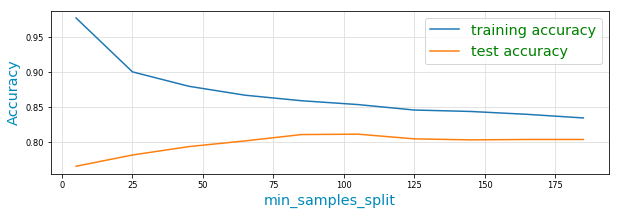

In [287]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>From the above graph <b>min_samples_split</b> of <b>50</b> seems to be optimal.
    </span>
</div>

> #### <span style="color:#008abc"><b> Tuning min_samples_leaf:</b></span>

In [307]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced',
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
tree.fit(X_train_lasso, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [308]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017155,0.002041,0.000801,0.000401,5,{'min_samples_leaf': 5},0.769006,0.780702,0.769006,0.783309,...,0.781387,0.013166,10,0.911453,0.916941,0.918039,0.913314,0.911152,0.914180,0.002824
1,0.012565,0.001196,0.000599,0.000489,25,{'min_samples_leaf': 25},0.807018,0.808480,0.793860,0.803807,...,0.805970,0.007404,7,0.847786,0.850348,0.849982,0.859912,0.847532,0.851112,0.004543
2,0.010371,0.000489,0.000399,0.000489,45,{'min_samples_leaf': 45},0.828947,0.804094,0.792398,0.802343,...,0.810067,0.013571,2,0.833882,0.836809,0.837907,0.842721,0.835101,0.837284,0.003050
3,0.009374,0.000488,0.000399,0.000489,65,{'min_samples_leaf': 65},0.807018,0.814327,0.802632,0.802343,...,0.808019,0.005201,4,0.823637,0.834248,0.835712,0.834309,0.828885,0.831358,0.004511
4,0.008576,0.000489,0.000599,0.000489,85,{'min_samples_leaf': 85},0.801170,0.812865,0.801170,0.809663,...,0.810360,0.009502,1,0.821442,0.830589,0.833516,0.831383,0.826325,0.828651,0.004296


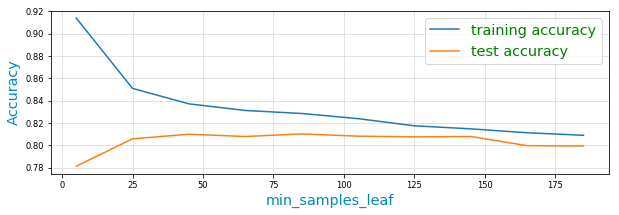

In [310]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>From the above graph <b>min_samples_leaft</b> of <b>25</b> seems to be optimal.
    </span>
</div>

### <span style="color:#008abc"><b> 3b. Decision Tree with tuned hyperparameters</b></span>

In [311]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_split': range(50, 100, 50),
    'min_samples_leaf': range(25, 100, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_lasso,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                

In [312]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016348,0.001189,0.000605,0.000494,entropy,5,25,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 25, 'min_samples_split': 50}",0.823099,0.812865,0.80117,0.808199,0.828446,0.814750,0.009879,2
1,0.013576,0.002729,0.000399,0.000489,entropy,5,75,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 75, 'min_samples_split': 50}",0.828947,0.812865,0.78655,0.803807,0.821114,0.810653,0.014679,4


In [313]:
print("Best Accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Best Accuracy 0.8176763242610477
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [318]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  max_depth=10, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_train_lasso, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [319]:
# accuracy score
clf_gini.score(X_test_lasso,y_test)

0.821160409556314

In [320]:
y_pred_lasso = clf_gini.predict(X_test_lasso)

> ### Metrics

In [321]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(y_test,y_pred_lasso))
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred_lasso))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred_lasso))

Accuracy score: 0.821160409556314

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       758
           1       0.85      0.77      0.81       707

    accuracy                           0.82      1465
   macro avg       0.82      0.82      0.82      1465
weighted avg       0.82      0.82      0.82      1465


Confusion Matrix:
 [[661  97]
 [165 542]]


> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Decision Tree Inference:</b>
        <ul>
            <li>Accuracy of 82% is achieved, with the 8 features selected by lasso, after tuning the hyperparameters.</li>
            <li>But recall has dropped to 77%</li>
        </ul>
    </span>
</div>

> ### <span style="color:#008abc"><b>4.LASSO & Random Forest</b></span>

In [322]:
from sklearn.model_selection import train_test_split
## Split into training and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

## Scale the columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [323]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train_lasso = model.transform(X_train)
ind = model.get_support(indices=True)

print(X_train_lasso.shape)
print(ind)

(3417, 10)
[ 5 11 13 22 23 24 28 59 60 61]


In [324]:
## Feature vector for decision tree
lasso_features = list(model_df.columns[ind])
print(lasso_features)

['loc_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'last_rech_days_8', 'arpu_diff', 'total_rech_amt_diff', 'total_og_diff']


### <span style="color:#008abc"><b> 4a. Random Forest with default hyperparameter</b></span>

In [325]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_train_lasso, y_train)

# Make predictions
y_pred_lasso = model_rf.predict(X_test_lasso)

> ### Metrics

In [327]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(y_test,y_pred_lasso))
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred_lasso))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred_lasso))

Accuracy score: 0.8197952218430035

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       758
           1       0.84      0.77      0.80       707

    accuracy                           0.82      1465
   macro avg       0.82      0.82      0.82      1465
weighted avg       0.82      0.82      0.82      1465


Confusion Matrix:
 [[658 100]
 [164 543]]


> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> Random forest(Default hyperparameters) with LASSO. 
    <b><ul>
        <li>Accuracy: 82% </li>
        <li>Precision: 84% </li>
        <li>Recall: 77% </li>
        <li>F1 score: 80% </li>
        </ul></b>
    </span>
</div>


>### <span style="color:#008abc"><b> Tuning Hyperparameters:</b></span>

> #### <span style="color:#008abc"><b> Tuning max_depth:</b></span>

In [328]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [329]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018945,0.002098,0.002791,2.128973e-03,2,{'max_depth': 2},0.809942,0.821637,0.758772,0.796486,...,0.798068,0.021330,18,0.811196,0.817417,0.796195,0.830651,0.811700,0.813432,0.011113
1,0.019548,0.000798,0.001795,3.986836e-04,3,{'max_depth': 3},0.828947,0.824561,0.826023,0.790630,...,0.818554,0.014111,15,0.823637,0.834248,0.831321,0.831017,0.821207,0.828286,0.004979
2,0.021542,0.001353,0.001995,1.168008e-07,4,{'max_depth': 4},0.821637,0.820175,0.827485,0.797950,...,0.820018,0.011911,14,0.834248,0.832053,0.849616,0.840527,0.843144,0.839918,0.006306
3,0.024734,0.000746,0.001796,3.988744e-04,5,{'max_depth': 5},0.837719,0.823099,0.821637,0.811127,...,0.826749,0.010805,4,0.846323,0.854007,0.852177,0.853694,0.848995,0.851039,0.002952
4,0.026758,0.001118,0.001596,7.981539e-04,6,{'max_depth': 6},0.839181,0.830409,0.818713,0.814056,...,0.826749,0.009112,4,0.864618,0.864618,0.864618,0.868325,0.859963,0.864428,0.002654


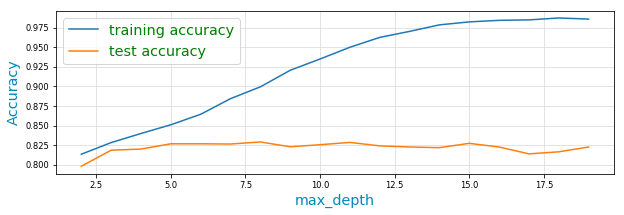

In [331]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>From the above graph <b>max_depth</b> of <b>8</b> seems to be optimal.
    </span>
</div>

> #### <span style="color:#008abc"><b> Tuning min_samples_split:</b></span>

In [335]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 20)}

# instantiate the model
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_lasso, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [336]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030941,2.777969e-03,0.001987,1.774605e-03,100,{'min_samples_split': 100},0.840643,0.826023,0.808480,0.812592,...,0.826163,0.014096,2,0.847786,0.851079,0.851079,0.858083,0.848995,0.851405,0.003570
1,0.030514,6.223882e-03,0.001996,7.776979e-07,120,{'min_samples_split': 120},0.837719,0.818713,0.820175,0.819912,...,0.826749,0.008774,1,0.846689,0.842298,0.850714,0.846379,0.846069,0.846430,0.002669
2,0.027718,1.463500e-03,0.001995,4.862804e-07,140,{'min_samples_split': 140},0.847953,0.821637,0.821637,0.802343,...,0.825285,0.014993,3,0.842664,0.845591,0.845957,0.847110,0.839122,0.844089,0.002883
3,0.027925,2.336015e-07,0.001995,2.780415e-07,160,{'min_samples_split': 160},0.827485,0.827485,0.811404,0.818448,...,0.823822,0.007998,4,0.830589,0.832419,0.843030,0.846379,0.846069,0.839697,0.006816
4,0.026728,3.989459e-04,0.001796,3.988743e-04,180,{'min_samples_split': 180},0.837719,0.823099,0.804094,0.809663,...,0.820603,0.012274,6,0.837175,0.834248,0.840834,0.837235,0.843876,0.838674,0.003336


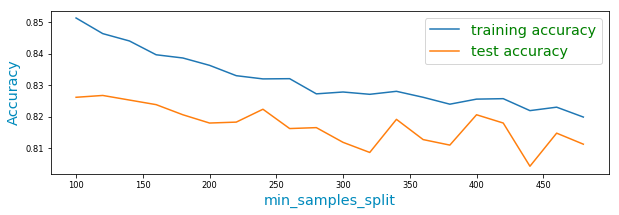

In [338]:
# plotting accuracies with param_min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>From the above graph <b>min_samples_split</b> of <b>120</b> seems to be optimal.
    </span>
</div>

> #### <span style="color:#008abc"><b> Tuning max_features:</b></span>

In [339]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

parameters = {'max_features': [2,4,6,8]}

# instantiate the model
rf = RandomForestClassifier(max_depth=5)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_lasso, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [340]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021787,0.004646,0.002002,0.001098,2,{'max_features': 2},0.833333,0.827485,0.809942,0.802343,...,0.821773,0.013263,3,0.847420,0.854007,0.852543,0.848574,0.844607,0.849430,0.003425
1,0.028125,0.006254,0.003124,0.006249,4,{'max_features': 4},0.824561,0.833333,0.830409,0.818448,...,0.829382,0.007426,1,0.850714,0.856202,0.854372,0.851134,0.850457,0.852576,0.002298
2,0.037492,0.007653,0.003124,0.006248,6,{'max_features': 6},0.837719,0.820175,0.817251,0.811127,...,0.826163,0.012754,2,0.854007,0.859495,0.861690,0.860278,0.855576,0.858209,0.002921
3,0.049129,0.005032,0.001196,0.000977,8,{'max_features': 8},0.828947,0.808480,0.811404,0.808199,...,0.819725,0.013365,4,0.854007,0.860959,0.863154,0.859546,0.853382,0.858210,0.003867


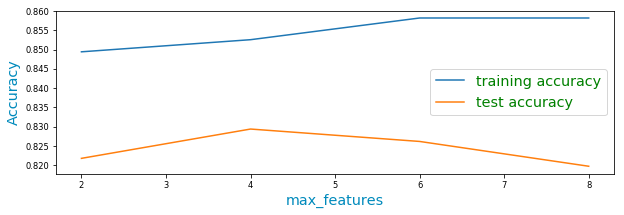

In [342]:
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>From the above graph <b>max_features</b> of <b>4</b> seems to be optimal.
    </span>
</div>

> #### <span style="color:#008abc"><b>Grid Search to Find Optimal Hyperparameters</b></span>

In [343]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_split': range(50, 200, 50),
    'max_features': [2,4,6,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
## Fit the grid search to the data
grid_search.fit(X_train_lasso, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    4.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [344]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.031243,8.991328e-07,0.005207,0.007364,4,2,50,"{'max_depth': 4, 'max_features': 2, 'min_samples_split': 50}",0.822651,0.820896,0.823529,0.822359,0.001095,22
1,0.031242,0.000000e+00,0.000000,0.000000,4,2,100,"{'max_depth': 4, 'max_features': 2, 'min_samples_split': 100}",0.822651,0.819140,0.813872,0.818554,0.003608,32


In [345]:
print("Best Accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

Best Accuracy 0.832601697395376
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


### <span style="color:#008abc"><b> 4b. Random forest with tuned hyperparameter</b></span>

In [346]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10, 
                             min_samples_split=50,
                             max_features=8,
                             )
rfc.fit(X_train_lasso,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [347]:
y_pred_lasso = rfc.predict(X_test_lasso)

> ### Metrics

In [348]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(y_test,y_pred_lasso))
print("\nClassification Report:\n",metrics.classification_report(y_test, y_pred_lasso))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,y_pred_lasso))

Accuracy score: 0.8382252559726963

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       758
           1       0.84      0.83      0.83       707

    accuracy                           0.84      1465
   macro avg       0.84      0.84      0.84      1465
weighted avg       0.84      0.84      0.84      1465


Confusion Matrix:
 [[643 115]
 [122 585]]


> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> Random forest(After tuning hyperparameters) with LASSO. 
    <b><ul>
        <li>Accuracy: 84% </li>
        <li>Precision: 84% </li>
        <li>Recall: 83% </li>
        <li>F1 score: 83% </li>
        </ul></b>
        <b>Features usggested by Lasso</b>: Features affecting churn
        <li>'loc_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'last_rech_days_8', 'arpu_diff', 'total_rech_amt_diff', 'total_og_diff'</li>
    </span>
</div>


> ### <span style="color:#008abc"><b>5.ADABOOST & Decision Tree</b></span>

> ### <span style="color:#008abc"><b> 5a. ADABOOST with hyperparameters</b></span>

In [361]:
# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5
from sklearn.ensemble import AdaBoostClassifier
# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [362]:
# fit
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [363]:
# predictions
# the second column represents the probability of a click resulting in a download
predictions = adaboost_model_1.predict(X_test)
#predictions

> ### Metrics

In [364]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(y_test,predictions))
print("\nClassification Report:\n",metrics.classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,predictions))

Accuracy score: 0.8627986348122867

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       758
           1       0.86      0.85      0.86       707

    accuracy                           0.86      1465
   macro avg       0.86      0.86      0.86      1465
weighted avg       0.86      0.86      0.86      1465


Confusion Matrix:
 [[660  98]
 [103 604]]


> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> ADABOOST with decision trees. 
    <b><ul>
        <li>Accuracy: 86% </li>
        <li>Precision: 86% </li>
        <li>Recall: 85% </li>
        <li>F1 score: 86% </li>
        </ul></b>
        <b> This clearly indicates that ADABOOST with decision trees, performs well on predicting the customers who will churn. 
    </span>
</div>


>### <span style="color:#008abc"><b> Tuning Hyperparameters:</b></span>

> Let's now tune the hyperparameters of the AdaBoost classifier. In this case, we have two types of hyperparameters - those of the component trees (max_depth etc.) and those of the ensemble (n_estimators, learning_rate etc.). We can tune both using the following technique - the keys of the form ```base_estimator_parameter_name``` belong to the trees (base estimator), and the rest belong to the ensemble.

In [353]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'f1', 
                               return_train_score=True,                         
                               verbose = 1)
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  3.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                mi

In [365]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.277363,0.005822,0.047229,0.000509,2,200,"{'base_estimator__max_depth': 2, 'n_estimators': 200}",0.864348,0.858648,0.858929,0.860641,0.002623,6,0.906865,0.918706,0.912097,0.912556,0.004845
1,6.622094,0.084068,0.109348,0.022094,2,400,"{'base_estimator__max_depth': 2, 'n_estimators': 400}",0.866087,0.867428,0.861702,0.865072,0.002445,5,0.920261,0.939289,0.932350,0.930634,0.007862
2,10.582159,0.449863,0.181398,0.038156,2,600,"{'base_estimator__max_depth': 2, 'n_estimators': 600}",0.868881,0.867660,0.868025,0.868189,0.000512,4,0.934028,0.945629,0.942199,0.940618,0.004866
3,7.683515,0.065445,0.054403,0.006388,5,200,"{'base_estimator__max_depth': 5, 'n_estimators': 200}",0.878632,0.865854,0.867660,0.870715,0.005647,2,1.000000,1.000000,1.000000,1.000000,0.000000
4,15.346281,0.025929,0.110594,0.002870,5,400,"{'base_estimator__max_depth': 5, 'n_estimators': 400}",0.882096,0.863158,0.863676,0.869643,0.008808,3,1.000000,1.000000,1.000000,1.000000,0.000000
5,22.622849,0.217896,0.156214,0.000001,5,600,"{'base_estimator__max_depth': 5, 'n_estimators': 600}",0.882507,0.868190,0.865961,0.872219,0.007331,1,1.000000,1.000000,1.000000,1.000000,0.000000


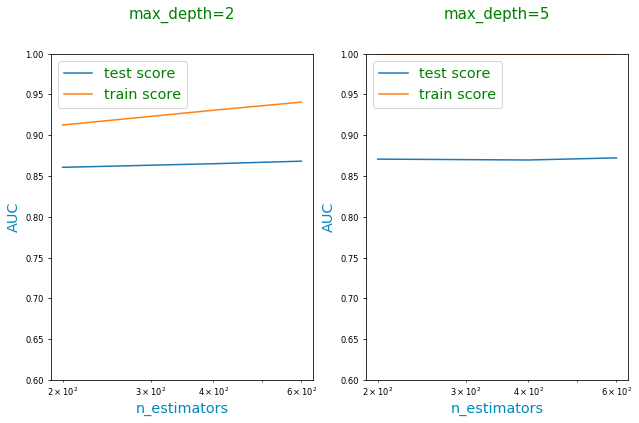

In [366]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

    


> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b>The results above show that:
    <ul>
    <li>The ensemble with max_depth=5 is clearly overfitting 
        (training auc is almost 1, while the test score is much lower)</li>
    <li>At max_depth=2, the model performs slightly better (approx 95% AUC) with a higher test score</li>
    <li> Thus, we should go ahead with max_depth=2 and n_estimators=200.</li>
    </ul>
        Note that we haven't experimented with many other important hyperparameters till now, such as learning rate, subsample etc., and the results might be considerably improved by tuning them. We'll next experiment with these hyperparameters.
    </span>
</div>

> ### <span style="color:#008abc"><b> 5b. ADABOOST with tuned hyperparameters</b></span>

In [367]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=200,
    algorithm="SAMME")

ABC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [370]:
# predict on test data
predictions = ABC.predict(X_test)
#predictions[:10]

> ### Metrics

In [371]:
from sklearn import metrics

print("Accuracy score:",metrics.accuracy_score(y_test,predictions))
print("\nClassification Report:\n",metrics.classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test,predictions))

Accuracy score: 0.8627986348122867

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       758
           1       0.86      0.85      0.86       707

    accuracy                           0.86      1465
   macro avg       0.86      0.86      0.86      1465
weighted avg       0.86      0.86      0.86      1465


Confusion Matrix:
 [[664  94]
 [107 600]]


> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> ADABOOST with Decision trees(After tuning hyperparameters). 
    <b><ul>
        <li>Accuracy: 86% </li>
        <li>Precision: 86% </li>
        <li>Recall: 85% </li>
        <li>F1 score: 86% </li>
        </ul></b>
        <b> This clearly indicates that ADABOOST with decision trees, performs well on predicting the customers who will churn. 
    </span>
</div>


In [373]:
# feature importance
import operator
importance = dict(zip(model_df.columns, ABC.feature_importances_))
importance
sorted_d = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
sorted_d

[('loc_ic_mou_8', 0.10004022107519554),
 ('last_rech_days_8', 0.0943889161707095),
 ('total_ic_mou_8', 0.07326100560838147),
 ('roam_ic_mou_8', 0.04287608376907744),
 ('last_day_rch_amt_8', 0.033440275959336414),
 ('total_og_diff', 0.03123905618974683),
 ('avg_isd_ic_mou_627', 0.028370414082594202),
 ('total_ic_diff', 0.027997660764061988),
 ('avg_total_rech_num_627', 0.027090693714058804),
 ('roam_og_mou_8', 0.025959043226337696),
 ('spl_ic_mou_8', 0.0245342951781224),
 ('vol_2g_mb_8', 0.023454914925367658),
 ('total_rech_amt_diff', 0.02343890931950239),
 ('avg_loc_ic_mou_627', 0.022165674979914333),
 ('loc_og_mou_8', 0.02196146343278094),
 ('arpu_diff', 0.021728043443321122),
 ('avg_arpu_627', 0.020470525003554292),
 ('arpu_8', 0.02032858033853551),
 ('vol_3g_mb_8', 0.019744159339553865),
 ('avg_offnet_mou_627', 0.01927765900736851),
 ('total_rech_num_8', 0.018828894015330014),
 ('avg_roam_og_mou_627', 0.018406454836383573),
 ('avg_roam_ic_mou_627', 0.01695784525119094),
 ('aon_years

> <div class="alert alert-block alert-info">
    <span style="color:black"><b>Inference:</b> The important features that help to predict churn are:
            <ul>
            <li> Feature : Weightage</li>
            <li>loc_ic_mou_8: 0.10004022107519554</li>
 <li>last_rech_days_8: 0.0943889161707095</li>
 <li>total_ic_mou_8: 0.07326100560838147</li>
 <li>roam_ic_mou_8: 0.04287608376907744</li>
 <li>last_day_rch_amt_8: 0.033440275959336414</li>
            </ul>
    </span>
</div>

## <span style="color:#008abc"><b> Recommendations:</b></span>

> <div class="alert alert-block alert-info">
    <span style="color:black">
            <ul>
            <li> The behaviour in the action month (8th month) is a strong indicator of churn. </li>
            <li>Also, the customers who are associated with the telecom operator for less than 4 years are more likely to churn.</li>
            </ul>
            The operator can look into the above mentioned features and provide offers to retain the high value customers who are likely to churn.
    </span>
</div>